In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("Fertilizer Prediction.csv")

In [35]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
import pandas_profiling as pp


In [5]:
profile=pp.ProfileReport(df,minimal=True,title="fertilizer")

In [6]:
profile.to_file("fertilizer.html")

In [7]:
import seaborn as sb

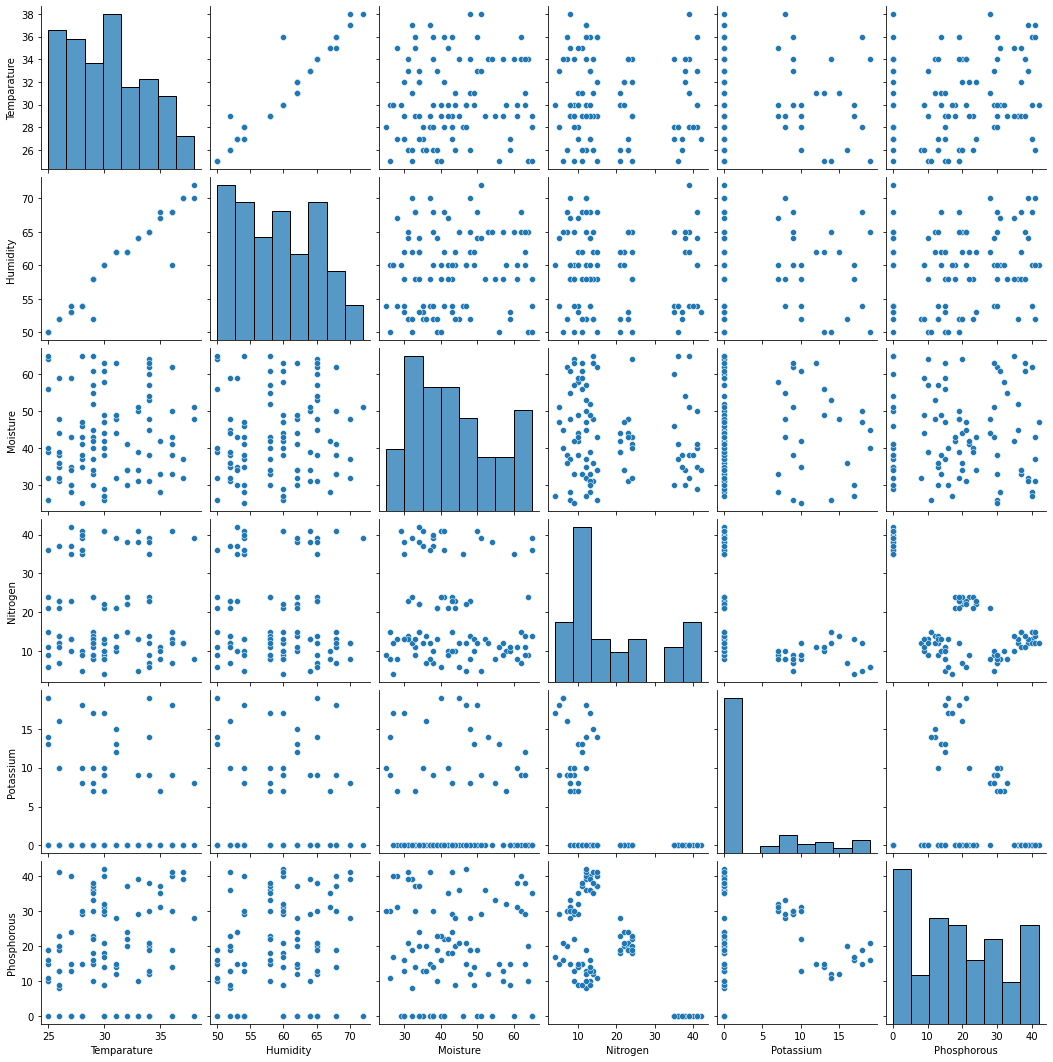

In [8]:
sb.pairplot(df)

In [36]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
y.shape

(99,)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.02,random_state=32)

In [26]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()

x_train=sc1.fit_transform(x_train)
x_test=sc1.transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
cal=RandomForestClassifier(n_estimators=100)

In [39]:
from sklearn.pipeline import make_pipeline
pipline=make_pipeline(ct,sc1,cal)

In [40]:
pipline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [3, 4])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [41]:
y_pred=pipline.predict(x_test)

In [42]:
y_pred

array(['28-28', 'Urea'], dtype=object)

In [43]:
import pickle

In [44]:
model=open("fertilizer_model.pkl","wb")
pickle.dump(pipline,model)
model.close()